In [1]:
import skimage, PIL, numpy

import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import utm
import geopandas as gpd
import pandas as pd

# calcul matriciel
import numpy as np
#statistics
import scipy
from scipy import stats
#plot graphique
import matplotlib.pyplot as plt
import seaborn as sns
import osgeo
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
from skimage.segmentation import mark_boundaries
import argparse
from osgeo import gdal
from matplotlib.offsetbox import AnchoredText
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

/home/karine/anaconda3/envs/image_proc/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


# Importer les données

In [4]:
features = ['Terre']
arbre1 = gdal.Open('../data_features/Arbres_Eparses/ae_01.tif')
arbre2 = gdal.Open('../data_features/Arbres_Eparses/ae_02.tif')
Terre1 = gdal.Open('../data_features/Terre/terre_01.tif')
Terre1 = gdal.Open('../data_features/Terre/terre_02.tif')

In [4]:
arbre1 = Image.open('../data_features/Arbres_Eparses/ae_01.tif')
arbre2 = Image.open('../data_features/Arbres_Eparses/ae_02.tif')
Terre1 = Image.open('../data_features/Terre/terre_01.tif')
Terre2 = Image.open('../data_features/Terre/terre_02.tif')
Foret_dense1 = Image.open('../data_features/Foret_dense/Foret_dense_01.tif')
Foret_dense2 = Image.open('../data_features/Foret_dense/Foret_dense_02.tif')
mer1 = Image.open('../data_features/Mer/mer_01.tif')
mer2 = Image.open('../data_features/Mer/mer_02.tif')
mer3 = Image.open('../data_features/Mer/mer_03.tif')
mer4 = Image.open('../data_features/Mer/mer_04.tif')
figs = [arbre1,arbre2,Terre1,Terre2]

In [10]:
# unravel GDAL affine transform parameters
c, a, b, f, d, e = arbre.GetGeoTransform()

def pixel2coord(col, row):
    """Returns global coordinates to pixel center using base-0 raster index"""
    xp = a * col + b * row + a * 0.5 + b * 0.5 + c
    yp = d * col + e * row + d * 0.5 + e * 0.5 + f
    return(xp, yp)

# Row analysis of histograms of color for different features

In [7]:
'''
Fonction to plot the distribution
of each canal RGB of the picture 
.tif 
'''

def distrib_plot(tif,name):
    #plt.clf()
    #tif = Image.open(fig)
    tif_RGB = tif.convert('RGB')
    matrice = (np.array(tif_RGB))
    r = pd.DataFrame(np.ravel(matrice[:,:,0]))
    g = pd.DataFrame(np.ravel(matrice[:,:,1]))
    b = pd.DataFrame(np.ravel(matrice[:,:,2]))
    sns.distplot(r,color='r', label = 'Canal Red')
    sns.distplot(g,color='g', label = 'Canal Green')
    sns.distplot(b,color='b', label = 'Canal Blue')
    plt.legend()
    plt.title(name)
    plt.savefig(name + '.png')

In [84]:
'''
Fonction to plot the distribution 
of each canal HSV of the picture 
.tif 
'''
def distrib_plot_hsv(tif,name):
    #plt.clf()
    #tif = Image.open(fig)
    tif_RGB = tif.convert('HSV')
    matrice = (np.array(tif_RGB))
    r = pd.DataFrame(np.ravel(matrice[:,:,0]))
    g = pd.DataFrame(np.ravel(matrice[:,:,1]))
    b = pd.DataFrame(np.ravel(matrice[:,:,2]))
    sns.distplot(r,color='r', label = 'Canal Hue')
    sns.distplot(g,color='g', label = 'Canal Saturation')
    sns.distplot(b,color='b', label = 'Canal Value')
    #plt.legend()
    plt.title(name)
    #plt.savefig(name + 'hsv.png')
    h = pd.DataFrame({'Hue':np.ravel(matrice[:,:,0])})
    s = pd.DataFrame({'Saturation':np.ravel(matrice[:,:,1])})
    v = pd.DataFrame({'Value':np.ravel(matrice[:,:,2])})
    #df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
    hdf = h.describe()
    modehdf = pd.DataFrame(h.mode())
    hdf1 = pd.concat([hdf, modehdf])
    sdf = s.describe()
    modesdf = pd.DataFrame(s.mode())
    sdf1 = pd.concat([sdf, modesdf])
    vdf = v.describe()
    modevdf = pd.DataFrame(v.mode())
    vdf1 = pd.concat([vdf, modevdf])
    df2 = pd.concat([hdf1,sdf1,vdf1],axis=1)
    ax = plt.gca()
    '''texts = ['alpha','beta','epsilon']
    colors = ['red','cyan','black']
    Texts = []
    for t,c in zip(texts,colors):
        Texts.append(TextArea(t,textprops=dict(color=c)))
    texts_vbox = VPacker(children=Texts,pad=0,sep=0)
    ann = AnnotationBbox(texts_vbox,(.02,.5),xycoords=ax.transAxes,
                                box_alignment=(0,.5),bboxprops = 
                                dict(facecolor='wheat',boxstyle='round',color='black'))
    ann.set_figure(fig)
    fig.artists.append(ann)'''
    return df2

# Analysis of the distribution of the RGB canals

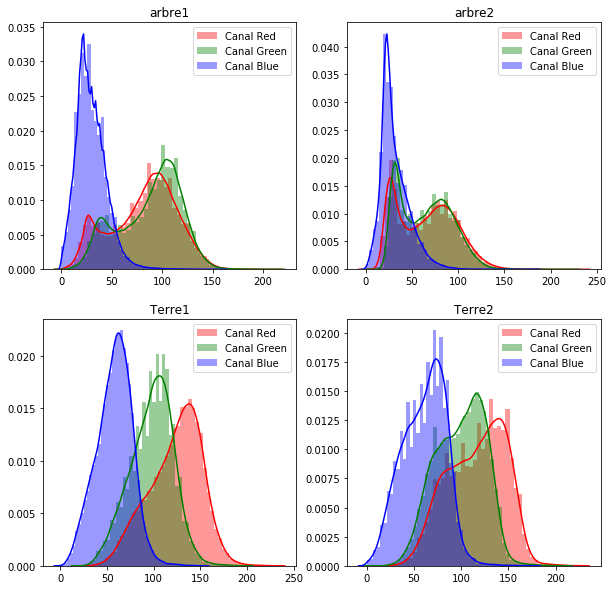

In [8]:
figs = [arbre1,arbre2,Terre1,Terre2]
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
distrib_plot(arbre1,'arbre1')
plt.subplot(2,2,2)
distrib_plot(arbre2,'arbre2')
plt.subplot(2,2,3)
distrib_plot(Terre1,'Terre1')
plt.subplot(2,2,4)
distrib_plot(Terre2,'Terre2')

We can observe that the different canals have composant which are correlated.
1. The green and red canals are almost overlapping .
2. The classes arbre and Terre are not welle separable.
So in order to separate better the classes, we use the HSV canals

# Distribution HSV

In [117]:
def stat_plot(df2,plt):
    ax = plt.gca()
    texts = ['Canals  Mean  std','Hue : ' + str(round(df2.loc['mean'][0])) + '  ' +str(round(df2.loc['std'][0])),'Saturation : ' + str(round(df2.loc['mean'][1])) +'  '+str(round(df2.loc['std'][1])), 'Value : '
            + str(round(df2.loc['mean'][2])) +'  '+str(round(df2.loc['std'][2]))]
    colors = ['black','red','green','blue']
    Texts = []
    for t,c in zip(texts,colors):
        Texts.append(TextArea(t,textprops=dict(color=c)))
    texts_vbox = VPacker(children=Texts,pad=0,sep=0)
    ann = AnnotationBbox(texts_vbox,(0.6,0.5),xycoords=ax.transAxes,
                                box_alignment=(0,.5),bboxprops = 
                                dict(facecolor='wheat',boxstyle='square',color='white'))
    ann.set_figure(fig)
    fig.artists.append(ann)

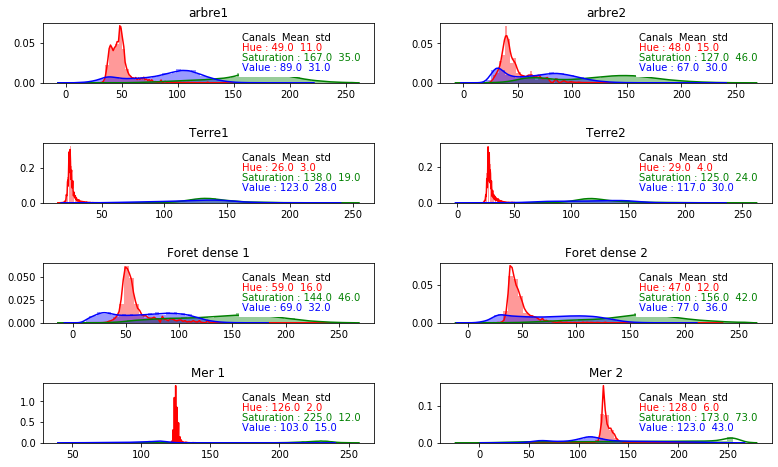

In [118]:
nx = 5
ny = 2
figs = [arbre1,arbre2,Terre1,Terre2]
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=2, right=0.8, top=2.5)
plt.subplot(nx,2,1)
df2 = distrib_plot_hsv(arbre1,'arbre1')
stat_plot(df2,plt)

plt.subplot(nx,2,2)
df2 = distrib_plot_hsv(arbre2,'arbre2')
stat_plot(df2,plt)

plt.subplot(nx,2,3)
df2 = distrib_plot_hsv(Terre1,'Terre1')
stat_plot(df2,plt)

plt.subplot(nx,2,4)
df2 = distrib_plot_hsv(Terre2,'Terre2')
stat_plot(df2,plt)

plt.subplot(nx,2,5)
df2 = distrib_plot_hsv(Foret_dense1,'Foret dense 1')
stat_plot(df2,plt)

plt.subplot(nx,2,6)
df2 = distrib_plot_hsv(Foret_dense2,'Foret dense 2')
stat_plot(df2,plt)
            
plt.subplot(nx,2,7)
df2 = distrib_plot_hsv(mer1,'Mer 1')
stat_plot(df2,plt)

plt.subplot(nx,2,8)
df2 = distrib_plot_hsv(mer2,'Mer 2')
stat_plot(df2,plt)
plt.subplots_adjust(hspace=1)

We observe a better separability between the classes. Let\'s look the statistics of the distribution for each class

# Statistical description without filtering

In [43]:
def statistical_hsv(tif):
    #plt.clf()
    #tif = Image.open(fig)
    tif_RGB = tif.convert('HSV')
    matrice = (np.array(tif_RGB))
    h = pd.DataFrame({'Hue':np.ravel(matrice[:,:,0])})
    s = pd.DataFrame({'Saturation':np.ravel(matrice[:,:,1])})
    v = pd.DataFrame({'Value':np.ravel(matrice[:,:,2])})
    #df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
    hdf = h.describe()
    modehdf = pd.DataFrame(h.mode())
    hdf1 = pd.concat([hdf, modehdf])
    sdf = s.describe()
    modesdf = pd.DataFrame(s.mode())
    sdf1 = pd.concat([sdf, modesdf])
    vdf = v.describe()
    modevdf = pd.DataFrame(v.mode())
    vdf1 = pd.concat([vdf, modevdf])
    df2 = pd.concat([hdf1,sdf1,vdf1],axis=1)
    #v.describe()
    return df2

In [47]:
statistical_hsv(Foret_dense1)

,Hue,Saturation,Value
count,131670.000000,131670.000000,131670.000000
mean,58.839721,143.860887,69.122959
std,16.480158,46.130977,32.370679
min,0.000000,0.000000,2.000000
25%,49.000000,109.000000,40.000000
50%,54.000000,148.000000,70.000000
75%,61.000000,178.000000,95.000000
max,240.000000,255.000000,174.000000
0,49.000000,85.000000,29.000000


In [48]:
statistical_hsv(Terre1)

,Hue,Saturation,Value
count,29458.000000,29458.000000,29458.000000
mean,25.781350,137.576040,123.293095
std,3.187122,19.482642,27.832873
min,16.000000,76.000000,29.000000
25%,24.000000,125.000000,105.000000
50%,25.000000,135.000000,127.000000
75%,27.000000,148.000000,144.000000
max,52.000000,248.000000,229.000000
0,25.000000,130.000000,140.000000


# Lissage histogram

In [119]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

In [121]:
im = arbre2.convert('HSV')
print(np.max(im))
# 1.0
#print(im.shape)
# (225, 225)
blur_box_kernel = np.ones((30,30)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18, 6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()


255


ValueError: convolve2d inputs must both be 2D arrays

convolution avec gaussian distr
filtrage bruit
play avec taille de la fenetre de lissage

# Statistical description

modes, mean, bornes[inf sup] 
distance entre modes de chaque feature
